# Analyze ETD clustering results

In [1]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import os

import utils


from pre_process import extract_mapped_doc2vecs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## DBSCAN iters

In [2]:
ITER = '1'
OBJ_PATH = '../obj/etd/DBSCAN/iter_' + ITER + '/' + 'dbscan_wrapper.sav'
os.chdir('/home/pkmandke/home/ECE/info_ret/cs5604-tml-clustering/src/')

In [3]:
dbscan_model = joblib.load(OBJ_PATH)

In [4]:
for _ in dbscan_model.model.labels_:
    if _:
        pass
        #print(_)
# Prints all -1

## Agglomerative clustering

In [5]:
aglo_model = joblib.load('../obj/etd/agglo_clus/iter_1/agglo_clus_obj.sav')

In [6]:
# set(aglo_model.predictions) # Prints number 0 through 499 verified 

In [7]:
dframe = pd.read_json('../data/30Kmetadata.json', orient=str, lines=True)[['identifier-uri',\
                                                                           'contributor-department', 'searchTitle']]
#clust = joblib.load('../obj/agglo_clus/iter_1/abstracts_etd_doc2vec_5000_docs_ag_clus.sav')

## Helper functions

In [8]:
def setify(depts):
    unq = []
    for st in depts:
        if st in unq:
            continue
        unq.append(st)
    return unq

def get_unique_field(df, field):
    
    return setify(df[field])

def find_docs_in_cluster(df, idx, clust):
    
    return df.loc[df['identifier-uri'].isin([clust.doc_names[_] for _ in idx])]

## Unique Departments of documents in a given cluster

In [9]:
pd.options.display.max_rows = 5002
def uniq_field(clus_idx, field):
    idx = [idx for idx, _ in enumerate(aglo_model.predictions) if _ == clus_idx] # Cluster numer
    depts = [_ for _ in dframe[field]]

    return get_unique_field(find_docs_in_cluster(dframe, idx, aglo_model), field)


In [10]:
#clust.doc_names[304]
uniq_field(1, 'contributor-department') # Cluster number 2

['Psychology ',
 'Sociology ',
 'Higher Education and Student Affairs ',
 'Educational Leadership and Policy Studies ',
 'Education ',
 'Housing, Interior Design, and Resource Management ',
 'Agricultural and Extension Education ',
 'Political Science ',
 'Mechanical Engineering ',
 'Human Development ',
 'Housing, Interior Design and Resource Management ',
 'Teaching and Learning ',
 'Educational Research and Evaluation ',
 'Engineering Education ',
 'Marriage and Family Therapy ',
 'Management ',
 'Adult and Continuing Education ',
 'Family and Child Development ',
 'Human Resources and Education ',
 'Vocational and Technical Education ',
 'Curriculum and Instruction ',
 'Administration and Supervision of Special Education ',
 'Counseling (School Psychology) ',
 'Instructional Supervision ',
 'Clothing and Textiles ',
 'Higher Education Administration ',
 'Student Personnel Services ',
 'Counselor Education and Student Personnel Services ',
 'Educational Research ']

In [11]:
uniq_field(2, 'contributor-department')

['Civil Engineering ',
 'Computer Science ',
 'Building Construction ',
 'Industrial and Systems Engineering ',
 'Aerospace and Ocean Engineering ',
 'Systems Engineering ',
 'Agricultural Economics ',
 'Industrial Engineering and Operations Research ',
 'Civil and Environmental Engineering ',
 'Mechanical Engineering ',
 'Architecture ',
 'Environmental Design and Planning ',
 'Public Administration and Public Affairs ',
 'Hospitality and Tourism Management ',
 'Accounting and Information Systems ',
 'Management ',
 'Business (Accounting) ',
 'Vocational and Technical Education ',
 'Wood Science and Forest Products ',
 'Community College Education ',
 'Business Administration (Accounting) ',
 'Forest Resources and Environmental Conservation ',
 'Engineering Education ',
 'School of Public and International Affairs ']

In [12]:
uniq_field(100, 'contributor-department')

['Veterinary Medical Sciences ']

In [13]:
### Compute standard scores

chs = utils.get_calinski_harabasz_score(aglo_model.feature_matrix, aglo_model.predictions)
dbs = utils.get_davies_bouldin_score(aglo_model.feature_matrix, aglo_model.predictions)
sc = utils.get_silhoutte_score(aglo_model.feature_matrix, aglo_model.predictions)

print("Calinski-Harasbasz Score {} \nDavies Bouldin Score {} \nSilhoutte Score {}".format(chs, dbs, sc))

Calinski-Harasbasz Score 25.153143449371612 
Davies Bouldin Score 3.4227245255504486 
Silhoutte Score -0.08218313008546829


## KMeans clustering

In [14]:
kmeans_model = joblib.load('../obj/etd/kmeans/iter_2/abstracts_etd_doc2vec_all_docs30961_docs_kmeans.sav')
etd_docvecs = joblib.load('../obj/etd/doc2vec/abstracts_etd_doc2vec_all_docs30961_docs')

In [15]:

data, keys = extract_mapped_doc2vecs(etd_docvecs)
#keys

In [16]:
ordered_labels = [kmeans_model.km.labels_[kmeans_model.doc_list.index(uri)] for uri in keys]

In [17]:
### Compute standard scores

chs = utils.get_calinski_harabasz_score(data, ordered_labels)
dbs = utils.get_davies_bouldin_score(data, ordered_labels)
sc = utils.get_silhoutte_score(data, ordered_labels)

print("Calinski-Harasbasz Score {} \nDavies Bouldin Score {} \nSilhoutte Score {}".format(chs, dbs, sc))

Calinski-Harasbasz Score 26.63756549021577 
Davies Bouldin Score 2.9849082706410637 
Silhoutte Score -0.07029791176319122


## BIRCH results

In [18]:
birch_model = joblib.load('../obj/etd/birch/iter_1/birch_full_data_docvecs.sav')
etd_docvecs = joblib.load('../obj/etd/doc2vec/abstracts_etd_doc2vec_all_docs30961_docs')

In [19]:
data, keys = extract_mapped_doc2vecs(etd_docvecs)
#keys

In [20]:
ordered_labels = [birch_model.model.labels_[birch_model.doc_list.index(uri)] for uri in keys]

In [21]:
### Compute standard scores

chs = utils.get_calinski_harabasz_score(data, ordered_labels)
dbs = utils.get_davies_bouldin_score(data, ordered_labels)
sc = utils.get_silhoutte_score(data, ordered_labels)

print("Calinski-Harasbasz Score {} \nDavies Bouldin Score {} \nSilhoutte Score {}".format(chs, dbs, sc))

Calinski-Harasbasz Score 25.06948550055764 
Davies Bouldin Score 3.4470936953000235 
Silhoutte Score -0.07461804151535034


# Visualization

In [22]:
import matplotlib.pyplot as plt

## Cluster Histograms

In [23]:
len(aglo_model.predictions[aglo_model.predictions == 1])

72

Text(0.5, 0, 'CLuster Number')

Text(0, 0.5, 'Cluster size')

Text(0.5, 1.0, 'Agglomerative Clustering')

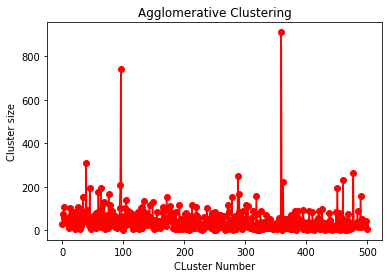

In [24]:
plt.plot(list(set(aglo_model.predictions)), [len(aglo_model.predictions[aglo_model.predictions == _]) \
                                             for _ in list(set(aglo_model.predictions))], '-ro')
plt.xlabel('CLuster Number')
plt.ylabel('Cluster size')
plt.title('Agglomerative Clustering')
plt.show()

Text(0.5, 0, 'CLuster Number')

Text(0, 0.5, 'Cluster size')

Text(0.5, 1.0, 'K-Means Clustering')

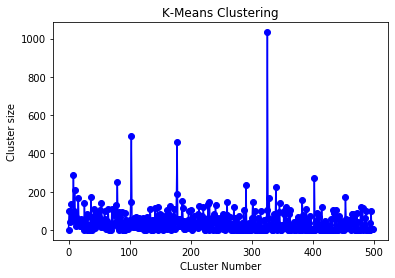

In [25]:
plt.plot(list(set(aglo_model.predictions)), [len(kmeans_model.km.labels_[kmeans_model.km.labels_ == _]) \
                                             for _ in list(set(kmeans_model.km.labels_))], '-bo')
plt.xlabel('CLuster Number')
plt.ylabel('Cluster size')
plt.title('K-Means Clustering')
plt.show()

Text(0.5, 0, 'CLuster Number')

Text(0, 0.5, 'Cluster size')

Text(0.5, 1.0, 'BIRCH Clustering')

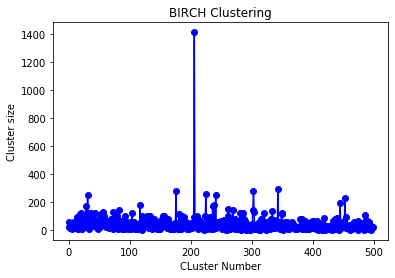

In [26]:
plt.plot(list(set(birch_model.model.labels_)), [len(birch_model.model.labels_[birch_model.model.labels_ == _]) \
                                             for _ in list(set(birch_model.model.labels_))], '-bo')
plt.xlabel('CLuster Number')
plt.ylabel('Cluster size')
plt.title('BIRCH Clustering')
plt.show()

## Average documents per cluster

In [27]:
print('Average Documents for Agglomerative Clustering {}'.format(utils.get_average_docs_per_cluster(aglo_model.predictions)))

Average Documents for Agglomerative Clustering 46.28


In [28]:
print('Average Documents for K-Means {}'.format(utils.get_average_docs_per_cluster(kmeans_model.km.labels_)))

Average Documents for K-Means 46.28


In [29]:
print('Average Documents for Birch {}'.format(utils.get_average_docs_per_cluster(birch_model.model.labels_)))

Average Documents for Birch 46.28
